# Discrete Probability Distribution Plot

In [1]:
try:
    import jax
except:
    %pip install jax
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    
try:
    from IPython import get_ipython
except:
    %pip install IPython
    from IPython import get_ipython

In [2]:
# Set this to False manually if running this notebook locally in stand-alone mode (without cloning the repo). 
# When nb_shell = False, figures will not be saved to disk.
nb_shell = "ipykernel" in str(get_ipython())

if nb_shell:
    import sys

    sys.path.append("../scripts")
    import pyprobml_utils as pml
    from latexify import latexify, format_axes

    latexify(n_figures=2, fig_height=1.5)

saving image to /home/patel_zeel/pyprobml-fork/scripts/../figures/uniform_histogram_latexified.pdf
saving image to /home/patel_zeel/pyprobml-fork/scripts/../figures/delta_histogram_latexified.pdf


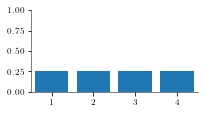

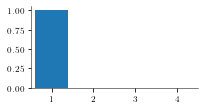

In [3]:
# Bar graphs showing a uniform discrete distribution and another with full prob on one value.

x = jnp.arange(1, 5)
uniform_probs = jnp.repeat(1.0 / len(x), len(x))


def make_graph(probs, save_name):
    plt.figure()
    plt.bar(x, probs, align="center")
    plt.xlim([min(x) - 0.5, max(x) + 0.5])
    plt.xticks(x)
    plt.yticks(jnp.linspace(0, 1, 5))
    if nb_shell and len(save_name) > 0:
        format_axes(plt.gca())
        pml.savefig(save_name)


make_graph(uniform_probs, "uniform_histogram_latexified.pdf")
make_graph([1, 0, 0, 0], "delta_histogram_latexified.pdf")

## Demo

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…

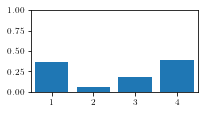

In [4]:
from ipywidgets import interact


@interact(seed=(0, 10))
def generate_random(seed):
    key = jax.random.PRNGKey(seed)
    probs = jax.random.uniform(key, shape=(4,))
    probs = probs / jnp.sum(probs)
    make_graph(probs, save_name="")